In [13]:
import pandas as pd
# Load the dataset to check its contents
file_path = 'E:/HTWD/metrics_val_all_days.csv'
file_path2 =  'E:/HTWD/metrics_test_all_days.csv'

data = pd.read_csv(file_path)
data2 = pd.read_csv(file_path2)

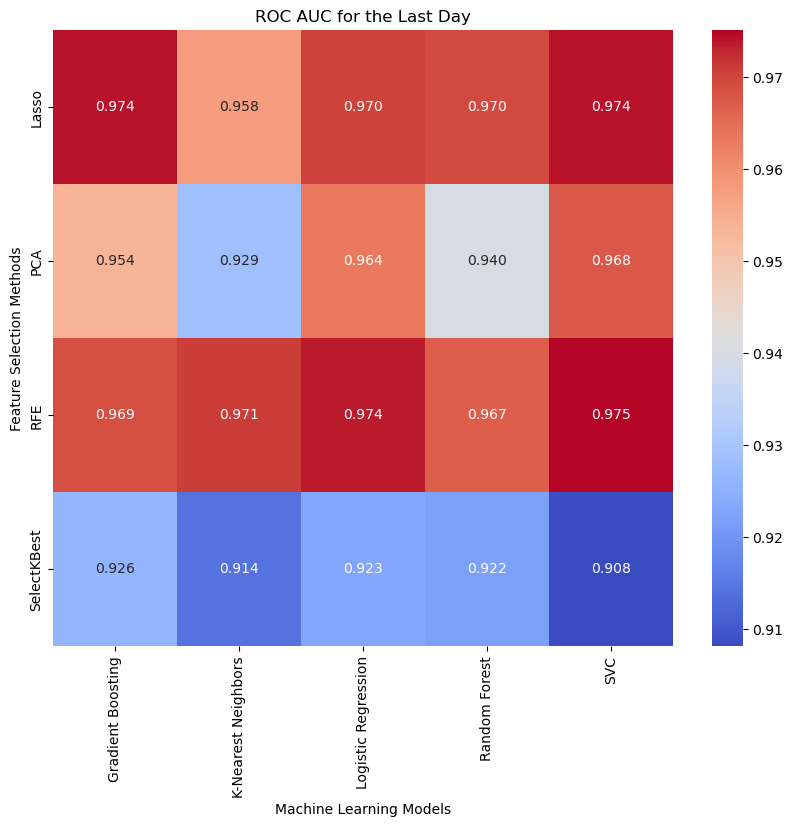

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the 'roc_auc' metric (first row) for all models
roc_auc_data = data.iloc[0, 1:].apply(lambda x: eval(x)[-1])

# Splitting columns into 'ML Model' and 'Feature Selection' for heatmap axes
models = [col.split(' + ')[1] for col in data.columns[1:]]
features = [col.split(' + ')[0] for col in data.columns[1:]]

# Reshaping the data for heatmap
roc_auc_matrix = pd.DataFrame(np.array(roc_auc_data).reshape((len(set(features)), len(set(models)))),
                              index=sorted(set(features)), columns=sorted(set(models)))

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(roc_auc_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('ROC AUC for the Last Day')
plt.xlabel('Machine Learning Models')
plt.ylabel('Feature Selection Methods')
plt.show()


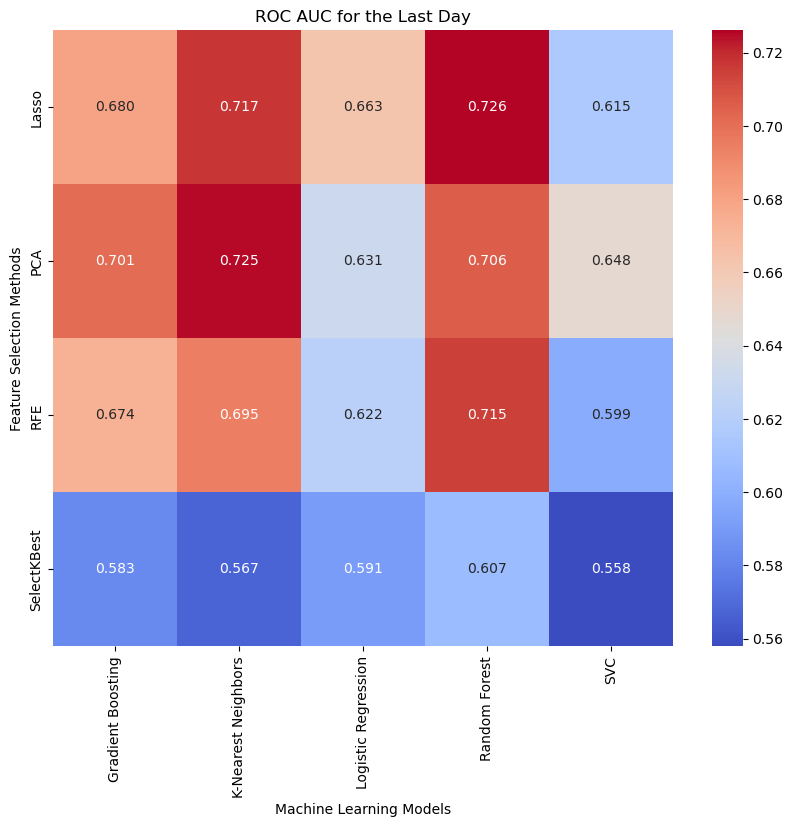

In [15]:
roc_auc_data = data2.iloc[0, 1:].apply(lambda x: eval(x)[-1])

# Splitting columns into 'ML Model' and 'Feature Selection' for heatmap axes
models = [col.split(' + ')[1] for col in data2.columns[1:]]
features = [col.split(' + ')[0] for col in data2.columns[1:]]

# Reshaping the data for heatmap
roc_auc_matrix = pd.DataFrame(np.array(roc_auc_data).reshape((len(set(features)), len(set(models)))),
                              index=sorted(set(features)), columns=sorted(set(models)))

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(roc_auc_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('ROC AUC for the Last Day')
plt.xlabel('Machine Learning Models')
plt.ylabel('Feature Selection Methods')
plt.show()


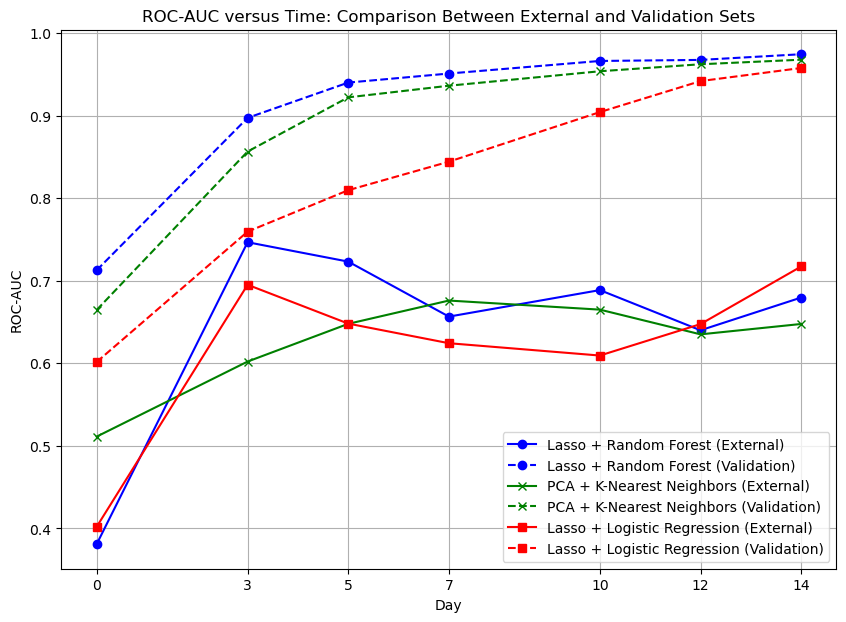

In [29]:
# Extract ROC-AUC values for multiple models across days for validation data
roc_auc_lasso_rf_val = data.loc[0, 'Lasso + Random Forest']
roc_auc_lasso_rf_val = eval(roc_auc_lasso_rf_val)

roc_auc_pca_knn_val = data.loc[0, 'PCA + K-Nearest Neighbors']
roc_auc_pca_knn_val = eval(roc_auc_pca_knn_val)

roc_auc_lasso_logistic_val = data.loc[0, 'Lasso + Logistic Regression']
roc_auc_lasso_logistic_val = eval(roc_auc_lasso_logistic_val)

# Days of interest
days_of_interest = [0, 3, 5, 7, 10, 12, 14]

# Generate the plot with multiple lines for both datasets (data2 and validation data)
plt.figure(figsize=(10, 7))

# Plot for Lasso + Random Forest
plt.plot(days_of_interest, roc_auc_lasso_rf, marker='o', linestyle='-', label='Lasso + Random Forest (External)', color='blue')
plt.plot(days_of_interest, roc_auc_lasso_rf_val, marker='o', linestyle='--', label='Lasso + Random Forest (Validation)', color='blue')

# Plot for PCA + K-Nearest Neighbors
plt.plot(days_of_interest, roc_auc_pca_knn, marker='x', linestyle='-', label='PCA + K-Nearest Neighbors (External)', color='green')
plt.plot(days_of_interest, roc_auc_pca_knn_val, marker='x', linestyle='--', label='PCA + K-Nearest Neighbors (Validation)', color='green')

# Plot for Lasso + Logistic Regression
plt.plot(days_of_interest, roc_auc_lasso_logistic, marker='s', linestyle='-', label='Lasso + Logistic Regression (External)', color='red')
plt.plot(days_of_interest, roc_auc_lasso_logistic_val, marker='s', linestyle='--', label='Lasso + Logistic Regression (Validation)', color='red')

# Adding titles and labels
plt.title('ROC-AUC versus Time: Comparison Between External and Validation Sets')
plt.xlabel('Day')
plt.ylabel('ROC-AUC')
plt.xticks(days_of_interest)
plt.legend()
plt.grid(True)
plt.show()
